# Project Scope

This project scope is to examine the data of the  interpret bioderversity data from the National Parks Service about endangered species in different parks.

Questions to answer are: 
1. Univariate
   - Distribution of observations of species (Histplot, Boxplot)
   - Compare counts of Species Category (Bar Chart)
   - Which park have the most Observation? (Pie Chart)
   
2. Bivariate
   - Compare Counts of Safe Conservasion status in every categories to see which category has the best status (Side-by-Side Boxplot)
   - Count of 'Castor canadensis' in each Park, the most famous scientific_name among the species (Pie Chart)
   - 


# I. Examine the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Examine the dataframes' first rows and column names

In [3]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [4]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [6]:
print(observations.columns)
print(species.columns)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


## 2. Examine the dataframes' summary statistics and shape

In [7]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [8]:
observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [9]:
print(observations.shape)
print(species.shape)

(23296, 3)
(5824, 4)


# II. Handling Missing Data

## 1. Check for missing data in each dataframe

In [10]:
observations.isna().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

In [11]:
species.isna().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

We can see that the conservation status data of the has many missing values. As we inspect the data, we could know that this occured because these species does not face any threats. This is Structurally Missing Data (SMD). Hence, we can change the missing data in this column to "Safe"

In [12]:
species = species.fillna(value={'conservation_status':'Safe'})

Inspect the species dataset again: 

In [13]:
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Safe
1,Mammal,Bos bison,"American Bison, Bison",Safe
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Safe
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Safe
4,Mammal,Cervus elaphus,Wapiti Or Elk,Safe
5,Mammal,Odocoileus virginianus,White-Tailed Deer,Safe
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",Safe
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


# III. Cleaning and Tidying Data

## 1. Dropping Duplicates rows

Examine if there is any duplicate values in the datasets

In [14]:
observations.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23291    False
23292    False
23293    False
23294    False
23295    False
Length: 23296, dtype: bool

In [15]:
observations = observations.drop_duplicates()

In [16]:
species.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5819    False
5820    False
5821    False
5822    False
5823    False
Length: 5824, dtype: bool

In [17]:
species = species.drop_duplicates()

## 2. Inspecting and Changing Data Types

In [18]:
observations.dtypes

scientific_name    object
park_name          object
observations        int64
dtype: object

In [19]:
species.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

All the columns have the correct data type, so there is no need to change the data type of any column.

In [20]:
observations.nunique()

scientific_name    5541
park_name             4
observations        304
dtype: int64

# IV. Univariate Data Visualization

## 1. Distribution of observations of species (Histplot, Boxplot)

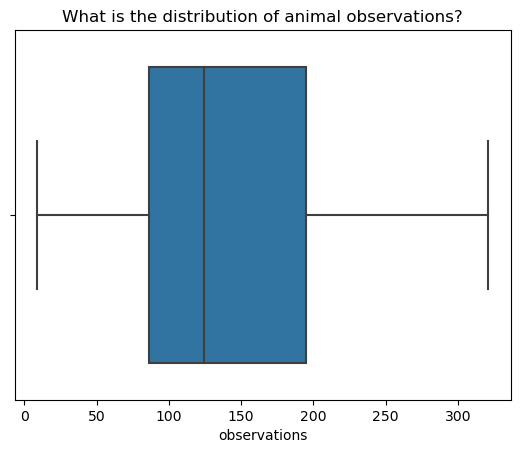

<Figure size 640x480 with 0 Axes>

In [37]:
sns.boxplot(data=observations, x='observations')
plt.title('What is the distribution of animal observations?')
plt.show()
plt.clf()

From the box plot, we can see that the IQR is around 90 observations, the median is 120, minimum and maximum values are 10 to 325. We can also see that there are not many outliers. For more details, we can plot a histogram.

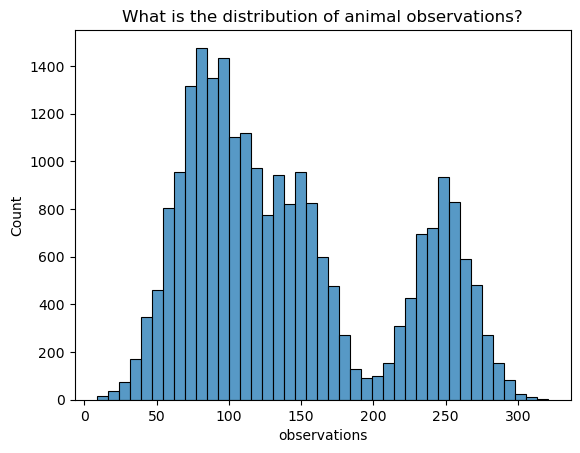

<Figure size 640x480 with 0 Axes>

In [38]:
sns.histplot(data=observations, x='observations')
plt.title('What is the distribution of animal observations?')
plt.show()
plt.clf()

The histogram showed that the mode of the dataset is around 75 observations. The histogram also has two normal distributions, one around 75 and one around 250 observations.

## 2. Compare counts of Species Category (Bar Chart)

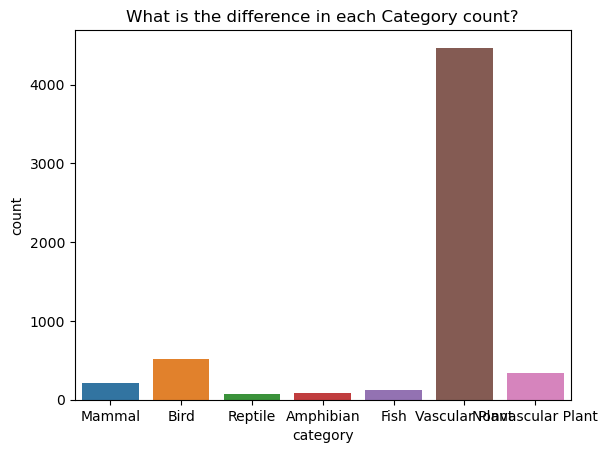

<Figure size 640x480 with 0 Axes>

In [39]:
sns.countplot(data=species, x='category')
plt.title('What is the difference in each Category count?')
plt.show()
plt.clf()

We can see that the category that appeared the most is Vascular Plan with over 4000 observations, following with bird with 600 observations. 

## 3. Which park have the most Observation? (Pie Chart)

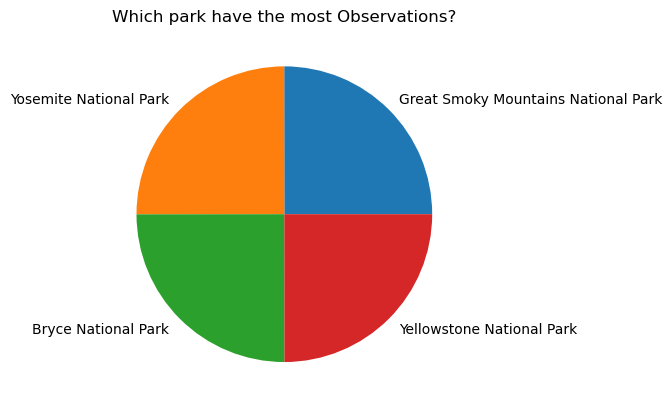

<Figure size 640x480 with 0 Axes>

In [40]:
park_count = observations['park_name'].value_counts()
park_label = observations['park_name'].unique()

plt.pie(park_count, labels=park_label)
plt.title('Which park have the most Observations?')
plt.show()
plt.clf()

From the pie chart above, we can see that the number of observations are divided equally between parks.

# V. Bivariate

## 1. Compare Counts of each Conservasion status in every categories to see which category has the best status (Side-by-Side Barplot)

In [25]:
#Investigate the different conservation statuses
species['conservation_status'].unique()

array(['Safe', 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [49]:
#Create 2 new dataframes which only includes animals with Conservation status 'Safe' and 'Threatened'
safe_df = species[species['conservation_status'] == 'Safe']

concern_df = species[species['conservation_status'] == 'Species of Concern']

endangered_df = species[species['conservation_status'] == 'Endangered']

threatened_df = species[species['conservation_status'] == 'Threatened']

recovery_df = species[species['conservation_status'] == 'In Recovery']

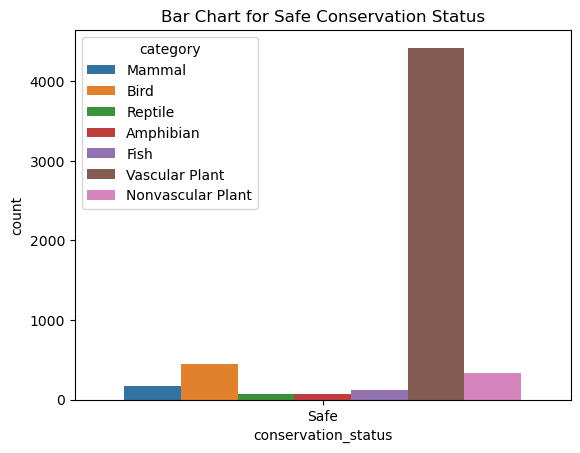

In [50]:
#Creating Bar Chart for Safe Conservation Status
sns.countplot(x='conservation_status', hue='category', data=safe_df)
plt.title('Bar Chart for Safe Conservation Status')
plt.show()

With this graph, we can see that the safest species is Vascular Plant, following with bird

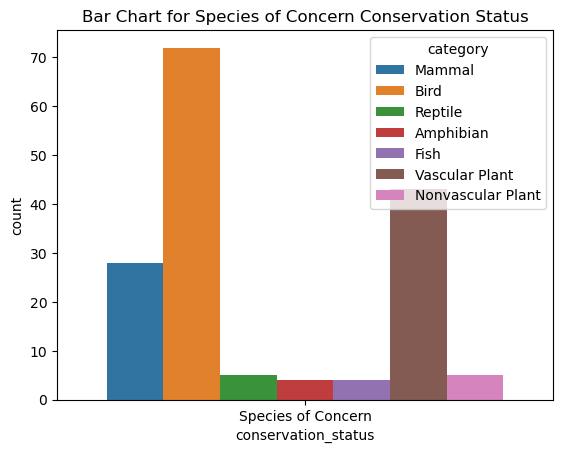

In [51]:
#Creating Bar Chart for Species of Concern Conservation Status
sns.countplot(x='conservation_status', hue='category', data=concern_df)
plt.title('Bar Chart for Species of Concern Conservation Status')
plt.show()

The species that dominated the conservation status Species of Concern is Bird, following with Vascular Plant. This alligns with the previous graph of the Safe status, as these 2 species are not threatened in a high level.

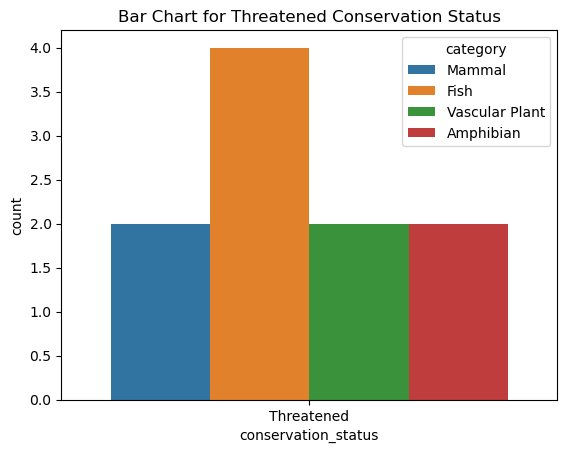

In [52]:
#Creating Side-by-Side Boxplot for Threatened Conservation Status
sns.countplot(x='conservation_status', hue='category', data=threatened_df)
plt.title('Bar Chart for Threatened Conservation Status')
plt.show()

As we can see, some species does not appear in the Threatened status, which is the most negative status of the Conservation statuses. The most threatened specie is Fish, which may suggest that the quality of water in these area are threatening this specie. 

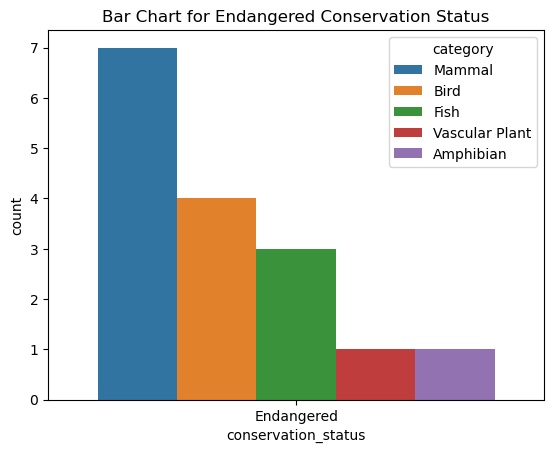

In [53]:
#Creating Side-by-Side Boxplot for Endangered Conservation Status
sns.countplot(x='conservation_status', hue='category', data=endangered_df)
plt.title('Bar Chart for Endangered Conservation Status')
plt.show()

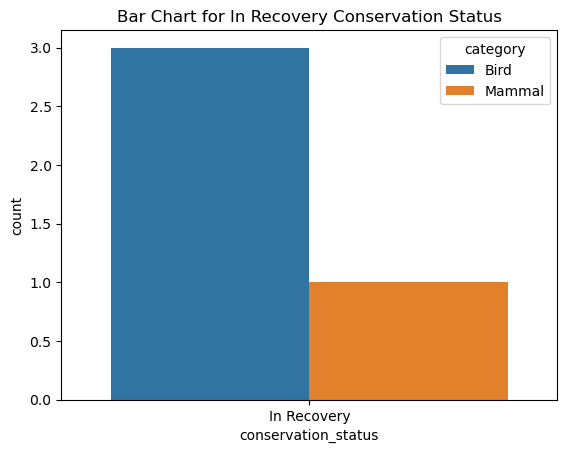

In [55]:
#Creating Side-by-Side Boxplot for In Recovery Conservation Status
sns.countplot(x='conservation_status', hue='category', data=recovery_df)
plt.title('Bar Chart for In Recovery Conservation Status')
plt.show()

In this graph, we can only see 2 species, which are Bird and Mammal. This means that the other species are either Safe or is experiencing some degree of Danger and are not able to recover yet. Bird is the specie that is recover the most. 

However, after we graping these data, we can notice that there may be bias in the data, as the count of each species are not the same. We can use a pie chart to examine this:

([<matplotlib.patches.Wedge at 0x16c666e50>,
 [Text(-0.8194151683088492, 0.7338656429792721, 'Mammal'),
  Text(0.4193067269083143, -1.0169473284145234, 'Bird'),
  Text(0.8276755659695222, -0.7245365121904012, 'Reptile'),
  Text(1.002602233839622, -0.452535921999348, 'Amphibian'),
  Text(1.0684606242131918, -0.261518440087801, 'Fish'),
  Text(1.0909473334596766, -0.14083293512961095, 'Vascular Plant'),
  Text(1.0990013653775208, -0.046861486301069386, 'Nonvascular Plant')])

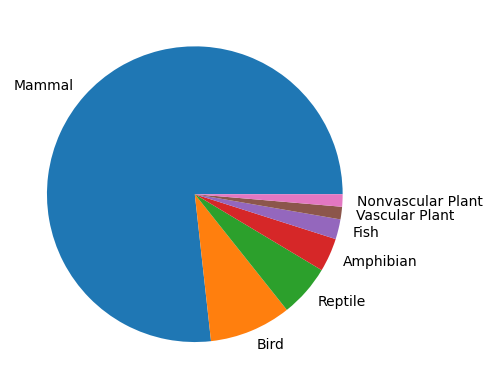

In [32]:
species_labels = species['category'].unique()

plt.pie(species['category'].value_counts(), labels=species_labels)

As we can see, the Mammal category dominates the other category. Hence, this could introduce bias to our data, as there are too many mammals compare to other categories

## 2. Count of 'Castor canadensis' in each Park, the most famous scientific_name among the species (Pie Chart)

First, we create a new dataframe that contains only the scientific name of 'Castor canadensis':

In [33]:
castor_df = observations[observations['scientific_name'] == 'Castor canadensis']

castor_df.head()

,scientific_name,park_name,observations
951,Castor canadensis,Great Smoky Mountains National Park,95
3792,Castor canadensis,Great Smoky Mountains National Park,62
6186,Castor canadensis,Yellowstone National Park,183
6303,Castor canadensis,Bryce National Park,70
9811,Castor canadensis,Yellowstone National Park,256


In [34]:
castor_df.shape

(12, 3)

Next, we create a pie chart based on this to acquire the distribution of Castor canadensis among the parks

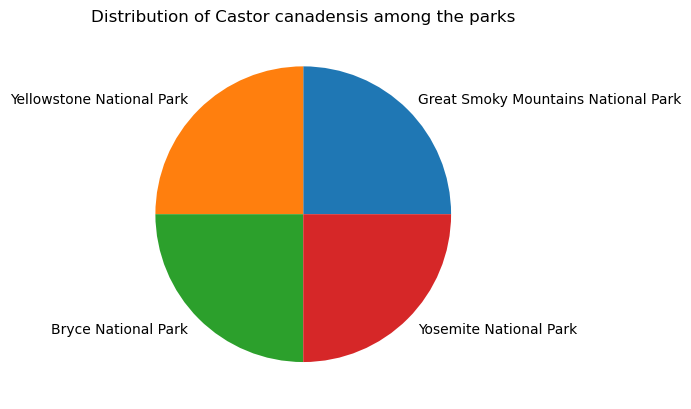

<Figure size 640x480 with 0 Axes>

In [54]:
park_labels = castor_df['park_name'].unique()

plt.pie(castor_df['park_name'].value_counts(), labels=park_labels)
plt.title('Distribution of Castor canadensis among the parks')
plt.show()
plt.clf()

This is an interesting fact, as we can see that both the original observations data and the castor dataframe have the same equal park distribution. This means that the data of each scientific name have the equal park distribution